<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/figures/PDSH-cover-small.png?raw=1">

*This notebook contains an excerpt from the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas; the content is available [on GitHub](https://github.com/jakevdp/PythonDataScienceHandbook).*

*The text is released under the [CC-BY-NC-ND license](https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode), and code is released under the [MIT license](https://opensource.org/licenses/MIT). If you find this content useful, please consider supporting the work by [buying the book](http://shop.oreilly.com/product/0636920034919.do)!*

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<!--NAVIGATION-->
< [Computation on NumPy Arrays: Universal Functions](02.03-Computation-on-arrays-ufuncs.ipynb) | [Contents](Index.ipynb) | [Computation on Arrays: Broadcasting](02.05-Computation-on-arrays-broadcasting.ipynb) >

<a href="https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/02.04-Computation-on-arrays-aggregates.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>


# 聚合操作(Aggregations): Min, Max以及兩者間的所有事

NumPy有內建快速的聚合函數可以在陣列上操作一些統計計算(總和、乘積、中位數、最大值和最小值、分位數等)

## 在陣列中做加總
使用`np.sum`函數可輕易做到

In [ ]:
# 法一: 使用Python內建的sum
import numpy as np
L = np.random.random(100)
sum(L)

54.12782415519449

In [ ]:
# 法二: 使用np.sum
np.sum(L) 

54.12782415519446

但是運算時間上還是Numpy會比較快

In [ ]:
big_array = np.random.rand(1000000) # 隨機樣本取值範圍是[0,1000000)，不包括1。
%timeit sum(big_array)
%timeit np.sum(big_array)

10 loops, best of 5: 74.5 ms per loop
1000 loops, best of 5: 314 µs per loop


## 最小值和最大值



In [ ]:
min(big_array), max(big_array)

(4.825635227745373e-06, 0.9999994080005382)

In [ ]:
np.min(big_array), np.max(big_array)

(4.825635227745373e-06, 0.9999994080005382)

In [ ]:
%timeit min(big_array)
%timeit np.min(big_array) # Numpy運算速度也是快很多

10 loops, best of 5: 51.5 ms per loop
1000 loops, best of 5: 362 µs per loop


### 多維度的聚合運算

常見的聚合運算是沿著一列或一欄進行，例如有一個儲存了一些資料的二維陣列:

In [ ]:
M = np.random.random((3, 4)) # 隨機產生3x4的矩陣
print(M)

[[0.19495377 0.82497668 0.97455177 0.09777112]
 [0.75039267 0.88965995 0.90268654 0.93647116]
 [0.92813998 0.43564307 0.09691045 0.61648808]]


預設，每一個Numpy的聚合函式會對於整個陣列傳回一個聚合運算後的結果:

In [ ]:
M.sum()

7.648645239608966

聚合函式接受*axis*參數，可選擇沿著哪一個軸來進行運算。


In [ ]:
M.min(axis=0) # 沿著垂直的軸取最小值

array([0.19495377, 0.43564307, 0.09691045, 0.09777112])

In [ ]:
M.max(axis=1) # 沿著水平(平=1)的軸取最大值

array([0.97455177, 0.93647116, 0.92813998])

### 其他聚合函式(供參考)

NumPy provides many other aggregation functions, but we won't discuss them in detail here.
Additionally, most aggregates have a ``NaN``-safe counterpart that computes the result while ignoring missing values, which are marked by the special IEEE floating-point ``NaN`` value (for a fuller discussion of missing data, see [Handling Missing Data](03.04-Missing-Values.ipynb)).
Some of these ``NaN``-safe functions were not added until NumPy 1.8, so they will not be available in older NumPy versions.

The following table provides a list of useful aggregation functions available in NumPy:

|Function Name      |   NaN-safe Version  | Description                                   |
|-------------------|---------------------|-----------------------------------------------|
| ``np.sum``        | ``np.nansum``       | Compute sum of elements                       |
| ``np.prod``       | ``np.nanprod``      | Compute product of elements                   |
| ``np.mean``       | ``np.nanmean``      | Compute mean of elements                      |
| ``np.std``        | ``np.nanstd``       | Compute standard deviation                    |
| ``np.var``        | ``np.nanvar``       | Compute variance                              |
| ``np.min``        | ``np.nanmin``       | Find minimum value                            |
| ``np.max``        | ``np.nanmax``       | Find maximum value                            |
| ``np.argmin``     | ``np.nanargmin``    | Find index of minimum value                   |
| ``np.argmax``     | ``np.nanargmax``    | Find index of maximum value                   |
| ``np.median``     | ``np.nanmedian``    | Compute median of elements                    |
| ``np.percentile`` | ``np.nanpercentile``| Compute rank-based statistics of elements     |
| ``np.any``        | N/A                 | Evaluate whether any elements are true        |
| ``np.all``        | N/A                 | Evaluate whether all elements are true        |

We will see these aggregates often throughout the rest of the book.

## 舉例:美國總統的平均身高

In [ ]:
import numpy as np
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/president_heights.csv')
heights = np.array(data['height(cm)'])
print(heights)

[189 170 189 163 183 171 185 168 173 183 173 173 175 178 183 193 178 173
 174 183 183 168 170 178 182 180 183 178 182 188 175 179 183 193 182 183
 177 185 188 188 182 185]


In [ ]:
!head -4 /content/president_heights.csv # 從president_heights.csv讀取前4列

order,name,height(cm)
1,George Washington,189
2,John Adams,170
3,Thomas Jefferson,189


In [ ]:
df = pd.DataFrame(data)
df.head(4)

,order,name,height(cm)
0,1,George Washington,189
1,2,John Adams,170
2,3,Thomas Jefferson,189
3,4,James Madison,163


接下來就可以進行一些摘要統計的計算

In [ ]:
df['name'].head(4)

0    George Washington
1           John Adams
2     Thomas Jefferson
3        James Madison
Name: name, dtype: object

In [ ]:
df['name'].head(-4)

0          George Washington
1                 John Adams
2           Thomas Jefferson
3              James Madison
4               James Monroe
5          John Quincy Adams
6             Andrew Jackson
7           Martin Van Buren
8     William Henry Harrison
9                 John Tyler
10             James K. Polk
11            Zachary Taylor
12          Millard Fillmore
13           Franklin Pierce
14            James Buchanan
15           Abraham Lincoln
16            Andrew Johnson
17          Ulysses S. Grant
18       Rutherford B. Hayes
19         James A. Garfield
20         Chester A. Arthur
21         Benjamin Harrison
22          William McKinley
23        Theodore Roosevelt
24       William Howard Taft
25            Woodrow Wilson
26         Warren G. Harding
27           Calvin Coolidge
28            Herbert Hoover
29     Franklin D. Roosevelt
30           Harry S. Truman
31      Dwight D. Eisenhower
32           John F. Kennedy
33         Lyndon B. Johnson
34            

In [ ]:
print("Mean height:       ", heights.mean())
print("Standard deviation:", heights.std())
print("Minimum height:    ", heights.min())
print("Maximum height:    ", heights.max())

Mean height:        179.73809523809524
Standard deviation: 6.931843442745892
Minimum height:     163
Maximum height:     193


In [ ]:
print("25th percentile:   ", np.percentile(heights, 25))
print("Median:            ", np.median(heights))
print("75th percentile:   ", np.percentile(heights, 75))

25th percentile:    174.25
Median:             182.0
75th percentile:    183.0


In [ ]:
# 關於matplotlib會在第4章介紹，這些先知道matplotlib是用來畫圖的就好
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # 設定繪圖的樣式

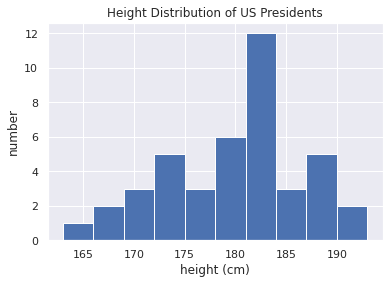

In [ ]:
plt.hist(heights)
plt.title('Height Distribution of US Presidents')
plt.xlabel('height (cm)')
plt.ylabel('number');

These aggregates are some of the fundamental pieces of exploratory data analysis that we'll explore in more depth in later chapters of the book.

<!--NAVIGATION-->
< [Computation on NumPy Arrays: Universal Functions](02.03-Computation-on-arrays-ufuncs.ipynb) | [Contents](Index.ipynb) | [Computation on Arrays: Broadcasting](02.05-Computation-on-arrays-broadcasting.ipynb) >

<a href="https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/02.04-Computation-on-arrays-aggregates.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>
